# Практическая работа №2: Классические методы математической статистики
Выполнил студент гр. 1375 Мкртчян Гарик Вариант №17

## Цель работы
Научится применять методы математической статистики для решения задач статистического анализа; сформировать навыки реализации методов с помощью прикладных программных пакетов.

## Основные теоретические положения
1. Теорема Колмогорова

$D_{n}(\overrightarrow{X}) = \overset{}{\underset{X \in \mathbb R}{sup}} |F_{0}(X_{i}) - F_{n}(X_{i})|$

Если гипотеза $H_{0}$ верна, и $F_{0}(X)$ - непрерывна на R, тогда $P(\sqrt{n} D_{n}(\overrightarrow{X}) < у) \xrightarrow[n \rightarrow \infty]{} K(у)$

где $K(у)=1-\alpha$ - функция распределения Колмогорова.

$D_{n} < у$ - гипотезу не отвергаем

 $D_{n} > y$ - гипотезу отвергаем

2. Критерий $\chi^2$ для проверки гипотез

Разбиваем множество значений случайной величины на r непересекающихся интервалов, которые покроют все возможные значения СВ.

$p_{i}$ - теоретическая вероятность попадания СВ в i-ый интервал при нулевой гипотезе.

$n_{i}$ - количество значений выборки, попавших в i-ый интервал

Сравниваем относительную и теоретическую частоты.

$\chi^{2}_в = \sum_{i=1}^{N}  \frac{(n_i-np_i)^2}{np_i}  $

Если $\chi^{2}_в >\chi^2_{1 - \alpha, r - 1}$, где

$r$ - кол-во интервалов, то гипотезу отвергаем. Если $\chi^{2}_в <\chi^2_{1 - \alpha, r - 1}$ - не отвергаем.

3. Наиболее мощный критерий простой гипотезы

Для нулевой гипотезы $H_{0}: \theta=\theta_{0}$ и альтернативной гипотезы $H_{А}: \theta=\theta_{A}$, где $\theta_{0}$ и $\theta_{A}$ - фиксированные параметры, строим статистику правдоподобия:

$LR(\overrightarrow{X},\theta_{A},\theta_{0})=\frac{L(\overrightarrow{X},\theta_{A})}{L(\overrightarrow{X},\theta_{0})}$ - статистика отношений правдоподобия,$L(\overrightarrow{X},\theta)$ - соответствующие функции максимального правдоподобия.

Наиболее мощный критерий представляется в виде


$ ϕ(x)=  \begin{Bmatrix} 1;  LR(X)>c \\
 p;  LR(X)=c ; \\0; LR(X)<c  \end{Bmatrix} $

где константа с и вероятность $ p \in [0,1) $ находятся из уравнения

$  E_{θ_0}ϕ(x)=P_{θ_0}(LR(X)>c)+pP_{θ_0}(LR(X)=c)=α$

Причем:

- константа с находится однозначно

- если $ P_{θ_0}(LR(X)=c)>0 $, то $ p \in [0,1) $ находится однозначно

- в области $ LR(X) \neq c $ критерий $ϕ$ определен однозначно

## Постановка задачи
Для полученных в результате эксперимента наборов данных выполнить статистическую обработку. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы
1. В результате эксперимента получены данные, приведенные в таблице 1.

In [551]:
import numpy as numpy
import matplotlib.pyplot as plot
import sps as sps
from scipy import stats
from scipy.stats import norm


array = [2, 0, 1, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 3, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0]

- a) Построить вариационный ряд, эмпирическую функцию распределения и гистограмму частот.

In [552]:
sorted_array = numpy.sort(array)
array_len = len(array)
variation_range = numpy.unique(sorted_array)
empirical_function = numpy.cumsum(numpy.bincount(sorted_array)) / array_len

print(f'Вариационный ряд - {sorted_array}')

Вариационный ряд - [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 3 3]


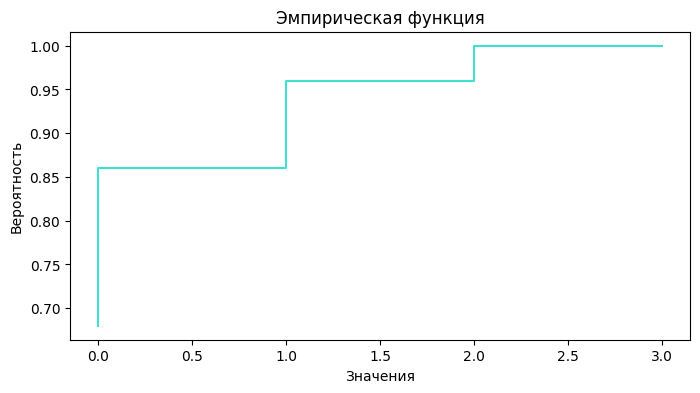

In [553]:
figure = plot.figure(figsize=(8, 4))
axes = figure.add_subplot(111)

plot.xlabel('Значения')
plot.ylabel('Вероятность')
plot.title('Эмпирическая функция')
axes.set_facecolor('white')

plot.step(variation_range, empirical_function, color='turquoise')

plot.show()

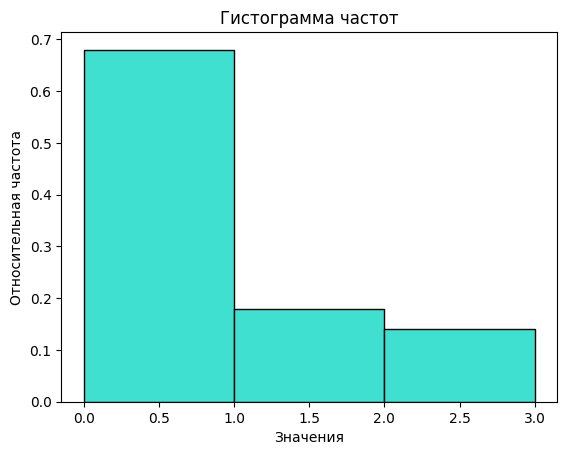

In [554]:
plot.hist(sorted_array, bins=range(min(sorted_array), max(sorted_array) + 1), density=True, edgecolor='black', color='turquoise')

plot.xlabel('Значения')
plot.ylabel('Относительная частота')
plot.title('Гистограмма частот')
axes.set_facecolor('white')

plot.show()

- б) Вычислить выборочные аналоги следующих числовых характеристик: (i) математического ожидания; (ii) дисперсии; (iii) СКО; (iv) медианы; (v) асимметрии; (vi) эксцесса, (vii) вероятности $\mathrm{P}(X\in \left[ a,b \right])$


In [555]:
a = 0.00
b = 1.02
mean = numpy.mean(array)
var = numpy.var(array)
std = numpy.std(array)
median = numpy.median(array)
skew = stats.skew(array)
kurtosis = stats.kurtosis(array)
probability = len([x for x in array if a <= x <= b]) / len(array)

print(f'Мат.ожидание - {mean}')
print(f'Дисперсия - {var}')
print(f'СКО - {numpy.sqrt(var)}')
print(f'Выборочное стандартное отклонение - {std}')
print(f'Медиана - {median}')
print(f'Асимметрия - {skew}')
print(f'Эксцесс - {kurtosis}')
print(f'Вероятность попадания в промежуток [{a}; {b}] - {probability}')

Мат.ожидание - 0.5
Дисперсия - 0.69
СКО - 0.8306623862918074
Выборочное стандартное отклонение - 0.8306623862918074
Медиана - 0.0
Асимметрия - 1.570250257640468
Эксцесс - 1.4580970384373044
Вероятность попадания в промежуток [0.0; 1.02] - 0.86


- с) В предположении, что исходные наблюдения являются выборкой из распределения Пауссона, построить оценку максимального правдоподобия параметра $\lambda$, а также оценку $\lambda$ по методу моментов. Найти смещение оценок.

Плотность распределения Пуассона: $P_{\lambda}(X=k) = \frac{\lambda^{k}}{k!}\cdot exp(-\lambda)$
ОМП

Функция правдоподобия: $L(\overrightarrow{X};\theta) = \prod_{i=1}^{n}P_{\lambda}(X_{i}) = \prod_{i=1}^{n}\frac{\lambda^{X_{i}}}{X_{i}!}\cdot exp(-\lambda) = \frac{\lambda^{\sum_{i=1}^{n}X_{i}}}{\prod_{i=1}^{n}(X_{i}!)}\cdot exp(-n\cdot \lambda)$

$LL(\overrightarrow{X};\theta) = \sum_{i=1}^{n}X_{i}\cdot \ln(\lambda)-\ln(\prod_{i=1}^{n}X_{i}!)-n\cdot \lambda$

Частная производная по параметру $\lambda$:
$\frac{\partial LL(\overrightarrow{X};\theta)}{\partial \lambda} = \frac{\sum_{i=1}^{n}X_{i}}{\lambda}-n = 0$
$\frac{\sum_{i=1}^{n}X_{i}}{\lambda} = n$
$\lambda = \frac{\sum_{i=1}^{n}X_{i}}{n}$
$\widehat{\lambda} = \overline{X}$

Значение параметра: $\widehat{\lambda}=\overline{X}=0.5$

ОММ

$\mathbb{E}X_{1} = \sum_{k=o}^\infty \cdot P(X=k) =  \sum_{k=o}^\infty  k \frac{\lambda^k} {k!}\cdot e^{-\lambda} = e^{-\lambda}(0+ \lambda+ \frac{2\lambda^{2}} {2!} + \frac{3\lambda^{3}} {3!}+ ...) = $ <br> $ = e^{-\lambda}(\lambda+ \frac{\lambda^{2}} {1!} + \frac{\lambda^{3}} {2!}+  \frac{\lambda^{4}} {3!}+ ..) = e^{-\lambda} \lambda( 1+ \lambda + \frac{\lambda^{2}} {2!} +\frac{\lambda^{3}} {3!} +...) = e^{-\lambda} \lambda e^{\lambda} = \lambda $

$\mathbb{E}X_{1}=\lambda;M_{1}=\overline{X}$ - параметр одномерный, система будет из одного уравнения

Из этого следует  $\widetilde{\lambda}=\overline{X}=0.5$

Для нахождения НРМД-оценки $g\left(T(\overrightarrow{X})\right)=\lambda^{\sum_{i=1}^{n}X_{i}}\cdot exp(-n\cdot \lambda)$
$h(\overrightarrow{X})=\frac{1}{\prod_{i=1}^{n}X_{i}!}$
Распределение Пуассона принадлежит экспоненциальному семейству, следовательно, МДС = $\sum_{i=1}^{n}X_{i}$ = ПДС
$\mathbb{E}\widehat{\lambda}= \mathbb{E}_{\lambda}\overline{X}=\mathbb{E}_{\lambda}\frac{1}{n}\cdot \sum_{i=1}^{n}x_{i}=\frac{1}{n}\cdot \mathbb{E_{\lambda}}\sum_{i=1}^{n}x_{i}=\frac{1}{n}\cdot \sum_{i=1}^{n}\mathbb{E_{\lambda}}X_{1}=\frac{1}{n}\cdot n\cdot \mathbb{E}_{\lambda}X_{1}=\lambda=0.5$ - НРМД-оценка

- d) Построить асимпотический доверительный интервал уровня значимости $\alpha_1$ для параметра $\lambda$ на базе оценки максимального правдоподобия.

$\sqrt{n}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N\left( 0, \frac{1}{I(\theta)} \right)$ <br>
$\widehat{\theta}=\widehat{\lambda}=\overline{X}$
$I(\theta)=-\mathbb{E}\left( \frac{\partial^{2} LL}{\partial \lambda^{2}} \right)=-\mathbb{E}\left( -\frac{\sum_{i=1}^{n}X_{i}}{\lambda^{2}} \right)=\frac{n}{\lambda^{2}}$

$\sqrt{n\cdot I\left( \widehat{\theta}(\overrightarrow{X})\right)} \cdot (\widehat{\theta}(\overrightarrow{X})-\theta) \sim N(0,1)$

$X_{\alpha}$: $\mathrm{Ф}(X_{\alpha})=1-\frac{\alpha_{1}}{2}=1-\frac{0.02}{2}=0.99 \ X_{0.99}=2.33$
$P(\sqrt{\frac{n^2}{\overline{X}}}(\overline{X}-λ) \in [-x_{α};x_{α}] ) = 1- \alpha = 0.9$

$\left[ \overline{X}-\frac{X_{0.99}}{\sqrt{50\cdot \frac{50}{\overline{X}}}}; \overline{X}+\frac{X_{0.99}}{\sqrt{50\cdot \frac{50}{\overline{X}}}}\right]$

$0.9534\le \lambda\le 1.0466$

АДИ найденное с помощью ОМП - от 0.9534 до 1.0466  с доверительной точностью  0.9

In [556]:
print(norm.ppf(1 - 0.02/2))

2.3263478740408408


- e) Используя гистограмму частот, построить критерий значимости $\mathcal{X^{2}}$ проверки простой гипотезы согласия с распределением Пуассона с параметром $\lambda_{0}$. Проверить гипотезу на урокень значимости $\alpha_{1}$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

$\Delta_0 = 0 \\ \Delta_1 = 1 \\ \Delta_2 = 2 \\ \Delta_3 = [3, + \infty)$

<br>

$p_k = P(\xi = k) = \frac{\lambda^k}{k!} e^{- \lambda}$

<br>

$p_0 = 0.135 \\ p_1 = 0.271 \\ p_2 = 0.271 \\ p_{\geq 3} = 0.323$

<br>

$\sum \limits_{i=0}^6 p_i = 1$

<br>

$ n = 50 \\ n_0 = 34 \\ n_1 = 9 \\ n_2 = 5 \\ n_3 = 2$

<br>

$\chi^2_в = \sum \frac{(n_i - np_i)^2}{np_i} = 129.33$

<br>

$\chi^2_{1 - 0.1, 4 - 1} = 6.251$

$\chi^2_в > \chi^2_{0.9, 3}$ из чего следует, что $H_0$  отвергается

Наибольший уровень значимости (при котором еще нет оснований отвергнуть гипотезу) стремится к нулю

In [557]:
n = 50
ni = [34, 9, 5, 2]
pi = [0.135, 0.271, 0.271, 0.323]
x = numpy.sum((ni - numpy.multiply(n, pi))**2 / (numpy.multiply(n, pi)))

print(x)

print(1 - stats.chi2.cdf(x, 2))

129.3298155066174
0.0


- f) Построить критерий значимости $X^2$ проверки сложной гипотезы согласия с распределением Пуассона. Проверить гипотезу по уровню значимости $\alpha_1$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

$P_i=P_{H0}=P\left(X\in I_i\right)={\textstyle\underset{k\in I_i}{\sum{\displaystyle\frac{\overline x^k}{k!}}exp(-\overline x)}}$

<br>

$\chi^2:\;{\chi^2}_{sel}={\textstyle\sum_{i=1}^m}\;\frac{n_i-nP_i}{nP_i}$

In [558]:
import math

array = [2, 0, 1, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 3, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0]
mean = numpy.mean(array)

def puasson(lambda_param, k):
    return lambda_param**k/math.factorial(k)*numpy.exp(-lambda_param)

n = 50
ni = [34, 9, 5, 2]
pi = []

for k in ni:
    pi.append(puasson(mean, k))

x = numpy.sum((ni - numpy.multiply(n, pi))**2 / (numpy.multiply(n, pi)))
print(x)
print(stats.chi2.ppf(1 - 0.1, 2))
print(1 - stats.chi2.cdf(x, 2))

1.9333902639815316e+50
4.605170185988092
0.0


- g)Построить наиболее мощный критерий проверки простой гипотезы пауссоновости с параметром $\lambda=\lambda_{0}$ при альтернативе пуассоновсти с параметром $\lambda=\lambda_{1}$. Проверить гипотезу на уровне значимости $\alpha_{1}$. Что получится, если поменять местами основную и альтернативную гипотезы?

$H_0 : \lambda = \lambda_0$
<br>
$H_A : \lambda = \lambda_1$
<br>
$L\left(\overrightarrow{X}, \theta\right) = \prod_{i=1}^{n}\frac{\lambda^{x_i}}{x_i!}\exp(-\lambda) = \exp(-n\lambda)\lambda^{\sum_{i=1}^{n}{x_i}}\prod_{i=1}^{n}\frac{1}{x_i!}$
<br>
$LR\left(\overrightarrow{X}, \lambda_0, \lambda_1\right) = \frac{L\left(\overrightarrow{X}, \lambda_1\right)}{L\left(\overrightarrow{X}, \lambda_0\right)} = \exp(-n(\lambda_1 - \lambda_0))\left(\frac{\lambda_1}{\lambda_0}\right)^{\sum_{i=1}^{n}{x_i}}$
<br>
$LR\left(\overrightarrow{X}\right) = \exp(-n(\lambda_1 - \lambda_0))\left(\frac{\lambda_1}{\lambda_0}\right)^{\sum_{i=1}^{n}{x_i}} > c \iff -n(\lambda_1 - \lambda_0) + \sum_{i=1}^{n}{x_i} \ln\frac{\lambda_1}{\lambda_0} > \ln c \iff \bar{X} > \frac{\ln c + n(\lambda_1 - \lambda_0)}{n\ln\frac{\lambda_1}{\lambda_0}} = c^*$
$LR\left(\overrightarrow{X}\right) < c \iff \bar{X} < c^*$
<br>
$P_{\lambda_0}\left(LR(\overrightarrow{X}) > c\right) + pP_{\lambda_0}\left(LR(\overrightarrow{X}) = c\right) = \alpha_1$
$P_{\lambda_0}\left(n\bar{X} > nc^*\right) + pP_{\lambda_0}\left(n\bar{X} = nc^*\right) = \alpha_1$
<br>
Пусть $LR(\overrightarrow{X}) \neq c$

Тогда $P_{\lambda_0}\left(n\bar{X} > nc^*\right) = 1 - F_{Pois(n\lambda_0)}\left(nc^*\right) = \alpha_1$

$F_{Pois(n\lambda_0)}\left(nc^*\right) = 1 - \alpha_1 = 0.98$


In [559]:
print(stats.poisson.ppf(0.98, len(array) * 6) / array_len)
print(mean)

6.72
0.5


$c^* = 6.72$
<br>
$\bar{X} = 2.0246$

$c^* > \bar{X}$ - принимаем гипотезу $H_0$
Поменяем местами гипотезы.
$H_0 : \lambda = \lambda_1$
$H_A : \lambda = \lambda_0$

<br>

$LR\left(\overrightarrow{X}, \lambda_1, \lambda_0\right) = \frac{L\left(\overrightarrow{X}, \lambda_0\right)}{L\left(\overrightarrow{X}, \lambda_1\right)} = \exp(-n(\lambda_0 - \lambda_1))\left(\frac{\lambda_0}{\lambda_1}\right)^{\sum_{i=1}^{n}{x_i}}$
Поскольку $LR\left(\overrightarrow{X}, \lambda_1, \lambda_0\right)$ монотонно зависит от выборочного среднего $\bar{X}$:
$LR\left(\overrightarrow{X}\right) > c \iff \bar{X} > c^*$
<br>
 $P_{\lambda_1}\left(LR(\overrightarrow{X}) > c\right) + pP_{\lambda_1}\left(LR(\overrightarrow{X}) = c\right) = \alpha_1$
 $P_{\lambda_1}\left(n\bar{X} > nc^*\right) + pP_{\lambda_1}\left(n\bar{X} = nc^*\right) = \alpha_1$
<br>
Пусть $LR(\overrightarrow{X}) \neq c$

Тогда $P_{\lambda_1}\left(n\bar{X} > nc^*\right) = 1 - F_{Pois(n\lambda_1)}\left(nc^*\right) = \alpha_1$

$F_{Pois(n\lambda_1)}\left(nc^*\right) = 1 - \alpha_1 = 0.98$

In [560]:
print(stats.poisson.ppf(0.98, array_len*3) / array_len)
print(mean)

3.52
0.5


$c^* = 3.52$
<br>
$\bar{X} = 2.0246$

$c^* > \bar{X}$ - принимаем гипотезу $H_0$

- h)В пунктах (c)-(f) заменить семейство распределение Пуассона на семейство геометрических распредленией $\mathbb{P}_{\lambda}(X=k)=\frac{\lambda^{k}}{(\lambda+1)^{k+1}}, k\in \mathbb{Z_{+}}$

- h) Пункт c) В предположении, что исходные наблюдения являются выборкой из геометрического распределения, построить ОМП и ОММ параметра $\lambda$.Найти смещение оценки.

Плотность распределения Пуассона: $P_{\lambda}(X=k)=\frac{\lambda^{k}}{(\lambda+1)^{k+1}}$
ОМП

Функция правдоподобия: $L(\overrightarrow{X};\theta)=\prod_{i=1}^{n}P_{\lambda}(X_{i})=\prod_{i=1}^{n}\frac{\lambda^{X_{i}}}{(\lambda+1)^{X_{i}}}=\frac{\lambda^{\sum_{i=1}^{n}X_{i}}}{(\lambda+1)^{\sum_{i=1}^{n}X_{i}+n}}$

$LL(\overrightarrow{X};\theta)= \sum_{i=1}^{n}X_{i}\cdot \ln(\lambda)-(\sum_{i=1}^{n}X_{i}+n)\ln(\lambda+1)$

Частная производная по параметру $\lambda$:
$\frac{\partial LL(\overrightarrow{X};\theta)}{\partial \lambda} = \frac{\sum_{i=1}^{n}X_{i}}{\lambda}-\frac{\sum_{i=1}^{50}X_{i}+n}{\lambda+1}=0\to
{\textstyle\overset n{\underset{i=1}{\lambda\sum x_i}}}+{\textstyle\overset n{\underset{i=1}{\sum x_i}}}=\lambda{\textstyle\overset n{\underset{i=1}{\sum x_i}}}+\lambda n$<br>
$\widehat\theta=\lambda=\frac1n\overset n{\underset{i=1}{\sum x_i}}$


ОММ

Для геометрического распределения  $P_{\lambda}(X=k)=\frac{\lambda^{k}}{(\lambda +1)^{k+1}}$

$\mathbb{E}X_{1}=\frac{1}{\lambda};M_{1}=\frac{1}{\overline{X}}$ - параметр одномерный, система будет из одного уравнения

$\widetilde{\theta}=\widetilde{\lambda}=\frac{1}{\overline{X}}=1$

Для нахождения НРМД-оценки $g\left(T(\overrightarrow{X})\right)=\frac{\lambda^{\sum_{i=1}^{n}X_{i}}}{(\lambda+1)^{\sum_{i=1}^{n}X_{i}+n}}$
Распределение Пуассона принадлежит экспоненциальному семейству, следовательно, МДС = $\sum_{i=1}^{n}X_{i}$ = ПДС
$\mathbb{E}_{\lambda}\widehat{\lambda}=\mathbb{E}_{\lambda}\overline{X}=\mathbb{E}_{\lambda}\frac{1}{n}\cdot \sum_{i=1}^{n}x_{i}=\frac{1}{n}\cdot \mathbb{E_{\lambda}}\sum_{i=1}^{n}x_{i}=\frac{1}{n}\cdot \sum_{i=1}^{n}\mathbb{E_{\lambda}}X_{1}=\frac{1}{n}\cdot n\cdot \mathbb{E}_{\lambda}X_{1}=\lambda=1$-НРМД-оценка



- h) Пункт d) Построить А.Д.И. уровня значимости $\alpha_1$ для параметра $\lambda$ на базе ОМП

$\sqrt{n}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N\left( 0, \frac{1}{I(\theta)} \right)$ <br>
$\widehat{\theta}=\widehat{\lambda}=\frac{1}{\overline{X}}$
$I(\theta)=-\mathbb{E}\left( \frac{\partial^{2} LL}{\partial \lambda^{2}} \right)=-\mathbb{E}\left( -\frac{\sum_{i=1}^{n}X_{i}}{\lambda^{2}}+\frac{\sum_{i=1}^{n}X_{i}+n}{(\lambda +1)^{2}} \right)=\frac{n}{\lambda^{2}}-\mathbb{E}\left( \frac{\sum_{i=1}^{n}X_{i}+n}{(\lambda+1)^{2}} \right) = \frac{n}{\lambda^{2}}-\mathbb{E}\left( \frac{\sum_{i=1}^{n}X_{i}}{(\lambda+1)^{2}} \right)-\mathbb{E}\left( \frac{n}{(\lambda+1)^{2}} \right)=\frac{n}{\lambda^{2}}-\frac{n}{(\lambda+1)^{2}}-\frac{n}{(\lambda+1)^{2}}=\frac{n(\lambda^{2}+1)}{(\lambda+1)^{2}\cdot \lambda^{2}}$
$\sqrt{n\cdot I\left(  \widehat{\theta}(\overrightarrow{X})\right)}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N(0,1)$
$X_{\alpha}$: $\mathrm{Ф}(X_{\alpha})=1-\frac{\alpha_{1}}{2}=1-\frac{0.02}{2}=0.99 \to X_{0.99}=2.33$
$P(\sqrt{\frac{n^2}{\overline{X}}}(\overline{X}-λ) \in [-x_{α};x_{α}] ) = 1- \alpha = 0.9$

$\left[ \frac{1}{\overline{X}}-\frac{X_{0.99}}{\sqrt{n\cdot \frac{n(\widehat{\lambda^{2}}+1)}{(\widehat{\lambda}+1)^{2}\cdot \widehat{\lambda^{2}}}}};\frac{1}{\overline{X}}+\frac{X_{0.99}}{\sqrt{n\cdot \frac{n(\widehat{\lambda^{2}}+1)}{(\widehat{\lambda}+1)^{2}\cdot \widehat{\lambda^{2}}}}} \right]$

$0.934\le \lambda\le 1.066$

АДИ найденное с помощью ОМП - от 0.934 до 1.066$  с доверительной точностью  0.9

- h) Пункт e) Используя гистограмму частот, построить критерий значимости $\mathcal{X^{2}}$ проверки простой гипотезы согласия с геометрическим распределением с параметром $\lambda_{0}$. Проверить гипотезу на урокень значимости $\alpha_{1}$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

$p_k = P(\xi = k) = \frac{\lambda_{0}^{k}}{(\lambda_{0}+1)^{k+1}}$

<br>

$\chi^2_{1 - 0.1, 4 - 1} = 6.251$

$\mathcal{X}^{2}\gt \mathcal{X}^{2}_{3,0.02}\to$ по критерию Пирсона мы отвергаем гипотезу

Наибольший уровень значимости (при котором еще нет оснований отвергнуть гипотезу) стремится к нулю

In [561]:
def geom(lambda_param, k):
    return lambda_param**k/(lambda_param + 1)**(k + 1)

n = 50
ni = [34, 9, 5, 2]
pi = []

for k in ni:
    pi.append(geom(0.5, k))

x = numpy.sum((ni - numpy.multiply(n, pi))**2 / (numpy.multiply(n, pi)))
print(x)
print(stats.chi2.ppf(1 - 0.1, 3))
print(1 - stats.chi2.cdf(x, 2))

5.783646613444846e+17
6.251388631170325
0.0


- h) Пункт f) Построить критерий значимости  $\mathcal{X^{2}}$ проверки сложной гипотезы согласия с геометрическим распределением. Проверить гипотезу по уровню значимости $\alpha_{1}$.Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

$p_k = P(\xi = k) =\sum_{k\in I_{i}}^{}\frac{\frac{1}{\overline{X}^{k}}}{\left( \frac{1}{\overline{X}} +1\right)^{k+1}}$

$\mathcal{X}^{2}\gt \mathcal{X}^{2}_{3,0.02}\to$ по критерию Пирсона мы отвергаем гипотезу

Наибольший уровень значимости (при котором еще нет оснований отвергнуть гипотезу) стремится к нулю

In [562]:
def geom(lambda_param, k):
    return lambda_param**k/(lambda_param + 1)**(k + 1)

n = 50
ni = [34, 9, 5, 2]
pi = []

for k in ni:
    pi.append(geom(mean, k))

x = numpy.sum((ni - numpy.multiply(n, pi))**2 / (numpy.multiply(n, pi)))
print(x)
print(stats.chi2.ppf(1 - 0.1, 2))
print(1 - stats.chi2.cdf(x, 2))

5.783646613444846e+17
4.605170185988092
0.0


2. В результате эксперимента получены данные, приведенные в таблице 2.


In [563]:
import numpy as numpy
import matplotlib.pyplot as plot
from scipy import stats
from scipy.stats import norm

array = [3.153, 7.950, 0.978, 2.592, 2.093, 1.241, 2.295, 0.031, 5.833, 0.498, 4.244, 0.597, 1.513, 1.347, 1.080, 0.498, 0.944, 0.252, 2.403, 0.047, 3.165, 1.168, 1.571, 2.217, 1.983, 0.127, 0.235, 0.018, 1.985, 1.493, 1.009, 1.475, 6.564, 2.400, 0.260, 0.172, 1.647, 0.767, 1.815, 1.697, 2.907, 0.035, 4.175, 9.956, 1.242, 3.391, 0.719, 1.292, 2.181, 3.975]


- a) Построить вариционный ряд, эмпирическую функцию распределения,гистограмму и полигон частот с шагом h.

In [564]:
sorted_array = numpy.sort(array)
array_len = len(array)
variation_range = numpy.unique(sorted_array)

print(f'Вариационный ряд - {sorted_array}')

Вариационный ряд - [0.018 0.031 0.035 0.047 0.127 0.172 0.235 0.252 0.26  0.498 0.498 0.597
 0.719 0.767 0.944 0.978 1.009 1.08  1.168 1.241 1.242 1.292 1.347 1.475
 1.493 1.513 1.571 1.647 1.697 1.815 1.983 1.985 2.093 2.181 2.217 2.295
 2.4   2.403 2.592 2.907 3.153 3.165 3.391 3.975 4.175 4.244 5.833 6.564
 7.95  9.956]


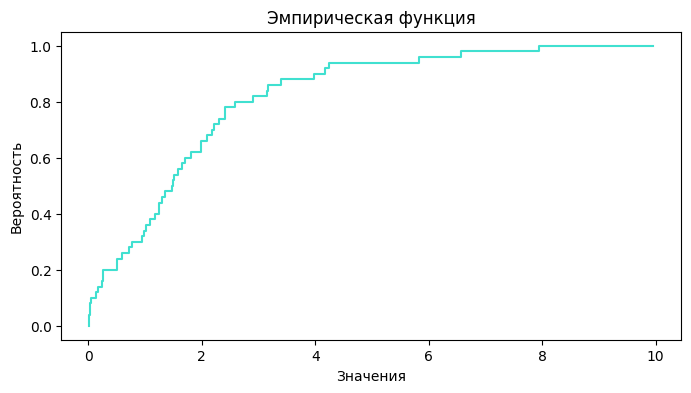

In [565]:
empirical_function = numpy.arange(1, n + 1) / n

figure = plot.figure(figsize=(8, 4))
axes = figure.add_subplot(111)

plot.xlabel('Значения')
plot.ylabel('Вероятность')
plot.title('Эмпирическая функция')
axes.set_facecolor('white')

plot.step(numpy.concatenate(([sorted_array[0]], sorted_array)), numpy.concatenate(([0], empirical_function)), color='turquoise')

plot.show()

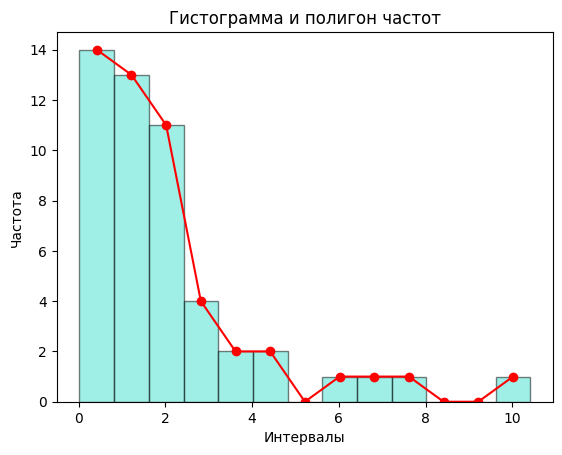

In [566]:
h=0.8
bins = numpy.arange(min(array), max(array) + h, h)
plot.hist(array, bins=bins, edgecolor='black', color='turquoise', alpha=0.5)
hist, _ = numpy.histogram(array, bins=bins)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
plot.plot(bin_centers, hist, color='red', marker='o', linestyle='-', label='Полигон')

plot.xlabel('Интервалы')
plot.ylabel('Частота')
plot.title('Гистограмма и полигон частот')
axes.set_facecolor('white')

plot.show()

- b) Вычислить выборочные аналоги следующих числовых характеристик: (i)математического ожидания; (ii)дисперсии; (iii)СКО; (iv)медиана; (v)асимметрии; (vi)эксцесса; (vii)вероятности $P(X \in [a,b]).$

In [567]:
c = 0.00
d = 3.60
mean = numpy.mean(array)
var = numpy.var(array)
std = numpy.std(array)
median = numpy.median(array)
skew = stats.skew(array)
kurtosis = stats.kurtosis(array)
probability = len([x for x in array if a <= x <= b]) / len(array)

print(f'Мат.ожидание - {mean}')
print(f'Дисперсия - {var}')
print(f'СКО - {numpy.sqrt(var)}')
print(f'Выборочное стандартное отклонение - {std}')
print(f'Медиана - {median}')
print(f'Асимметрия - {skew}')
print(f'Эксцесс - {kurtosis}')
print(f'Вероятность попадания в промежуток [{c}; {d}] - {probability}')

Мат.ожидание - 2.0246
Дисперсия - 4.06571244
СКО - 2.0163611878827665
Выборочное стандартное отклонение - 2.0163611878827665
Медиана - 1.5030000000000001
Асимметрия - 1.9699123794741704
Эксцесс - 4.304515522579543
Вероятность попадания в промежуток [0.0; 3.6] - 0.34


- c)В предположении, что исходные наблюдения являются выборкой из показательного распределения, построить оценку максимального правдоподобия параметра $\lambda$, а также оценку $\lambda$ по методу моментов. Найти смещение оценок.

Плотность показательного распределения: $P(X)=\lambda\cdot exp(-\lambda X), X\ge 0$
ОМП

Функция правдоподобия: $L(\overrightarrow{X},\theta)=\prod_{i=1}^{n}\lambda\cdot exp(-\lambda\cdot X_{i})=\lambda^{n}\cdot exp(-\lambda\cdot \sum_{i=1}^{n}X_{i})$

$LL(\overrightarrow{X},\theta)=n\ln(\lambda)-\lambda\cdot \sum_{i=1}^{n}X_{i}$

Частная производная по параметру $\lambda$:
$\frac{\partial LL}{\partial \lambda}=\frac{n}{\lambda}-\sum_{i=1}^{n}X_{i}=0$
$\frac{n}{\lambda}-\sum_{i=1}^{n}X_{i}=0 \to \lambda=\frac{n}{\sum_{i=1}^{n}X_{i}}=\frac{1}{\overline{X}}$

⠀$\widehat{\lambda}=\frac{1}{\overline{X}}=0.49$


ОММ

$P(X)=\lambda\cdot exp(-\lambda X)$

$\mathbb{E}X_{1}=\lambda;M_{1}=\overline{X}$ - параметр одномерный, система будет из одного уравнения

Из этого следует  $\widetilde{\theta}=\widetilde{\lambda}=\frac{1}{\overline{X}}=0.49$


Для нахождения НРМД-оценки $g\left(T(\overrightarrow{X})\right)=\lambda^{\sum_{i=1}^{n}X_{i}}\cdot exp(-n\cdot \lambda)$
$h(\overrightarrow{X})=1$

$T=\sum_{i=1}^{n}X_{i}=101.23$

Геометрическое распределение принадлежит экспоненциальному семейству, следовательно, МДС=$\sum_{i=1}^{n}X_{i}$=ПДС

$\mathbb{E}_{\lambda}\frac{1}{\overline{X}}=\mathbb{E}_{\lambda}\frac{n}{\sum_{i=1}^{n}x_{i}}=n\cdot \mathbb{E_{\lambda}}\frac{1}{\sum_{i=1}^{n}x_{i}}=n\cdot \mathbb{E}_{\lambda}(\sum_{i=1}^{n}X_{i})^{-1}=n\cdot \left(\frac{1}{\lambda}\right)^{-1}\frac{\Gamma (-1+n)}{\Gamma (n)}=n\cdot \lambda\frac{\Gamma (-1+n)}{\Gamma(-1+n)\cdot (n-1)}=\frac{n\cdot \lambda}{n-1}$-смещенная-оценка

$\widetilde{\lambda}=\widehat{\lambda}\frac{n-1}{n}$

$\mathbb{E}_{\lambda}\widetilde{\lambda}=\mathbb{E}_{\lambda}\widehat{\lambda}\frac{n-1}{n}=\frac{n-1}{n}\mathbb{E}_{\lambda}\widehat{\lambda}=\frac{n-1}{n}\cdot \frac{n\cdot \lambda}{n-1}=\lambda$-НРМД-оценка
<br>
$X_{i}\sim Exp(\lambda) \to X_{i}\sim Gamma(1,\frac{1}{\lambda})\Rightarrow \sum_{i=1}^{n}X_{i}\sim Gamma(n,\frac{1}{\lambda})$
<br>
Если $X_{i}\sim Gamma(\alpha,\beta)$, где $\alpha\gt 0$ и $\beta\gt 0$, $\gamma\gt -\alpha$, то $\mathbb{E}X_{i}^{\gamma}=\beta^{\gamma}\frac{Г(\gamma+\alpha)}{Г(\alpha)}$

In [568]:
print(round(1/numpy.mean(array), 2))

print(round(sum(array), 2))

0.49
101.23


- d) Построить асимптотический доверительный интервал уровня значимости $\alpha_2$ для параметра $\lambda$ на базе оценки максимального правдоподобия.

$\sqrt{n}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N\left( 0, \frac{1}{I(\theta)} \right)$ <br>
$\widehat{\theta}=\widehat{\lambda}=\frac{1}{\overline{X}}$
$I(\theta)=-\mathbb{E}\left( \frac{\partial^{2} LL}{\partial \lambda^{2}} \right)=-\mathbb{E}\left( -\frac{n}{\lambda^{2}} \right)=\frac{n}{\lambda^{2}}$

$\sqrt{n\cdot I\left( \widehat{\theta}(\overrightarrow{X})\right)} \cdot (\widehat{\theta}(\overrightarrow{X})-\theta) \sim N(0,1)$

$X_{\alpha}$: $\mathrm{Ф}(X_{\alpha})=1-\frac{\alpha_{1}}{2}=1-\frac{0.02}{2}=0.99 \ X_{0.99}=2.33$
$P(\sqrt{\frac{n^2}{\overline{X}}}(\overline{X}-λ) \in [-x_{α};x_{α}] ) = 1- \alpha = 0.9$

$\left[ \overline{X}-\frac{X_{0.99}}{\sqrt{50\cdot \frac{50}{\overline{X}}}}; \overline{X}+\frac{X_{0.99}}{\sqrt{50\cdot \frac{50}{\overline{X}}}}\right]$

$0.9534\le \lambda\le 1.0466$

АДИ найденное с помощью ОМП - от 0.9534 до 1.0466  с доверительной точностью  0.9

- e) С использованием теоремы Колмогорова построить критерий значимости проверки простой гипотезы согласия с показательным распределением с параметром $\lambda_0$. Проверить гипотезу на уровне значимости $\alpha_2$. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

$H_0 : F \equiv Exp(\lambda_0)$

$H_A : \exists x : F(x) \neq F_{Exp(\lambda_0)}(x)$

Вводим функцию $\phi(x)$:

$\phi(x) = 0$, при $D_n \le x_{\alpha_2}$

$\phi(x) = 1$, при $D_n > x_{\alpha_2}$

где $x_{\alpha_2}$ определяется как: $K(x_{\alpha_2} / \sqrt{n}) = 1 - \alpha_2$

In [569]:
array_values, array_edges = numpy.histogram(array, bins=array_len)
cumsum = array_values.cumsum() / array_len

def empirical_distribution(x, cumsum, edges):
    for i in range(len(cumsum)):
        if x > edges[i] and x <= edges[i+1]:
            return cumsum[i]
        elif x > edges[-1]:
            return 1
        elif x <= edges[0]:
            return 0

def theoretical_distribution(x, lambda_0):
    return 1 - numpy.exp(-x * lambda_0)

alpha_2 = 0.02
lambda_0 = 0.25
kolmogorov = 0
cur_x = 0

while cur_x <= 5:
    cur_statistic = numpy.abs(empirical_distribution(cur_x, cumsum, array_edges) - theoretical_distribution(cur_x, lambda_0))
    kolmogorov = max(kolmogorov, cur_statistic)
    cur_x += 0.0001

critical_value = stats.kstwobign.ppf(1 - alpha_2) / numpy.sqrt(array_len)

print("Вычисленное значение статистики Колмогорова - ", kolmogorov)
print("Вычисленное критическое значение статичтики Колмогорова:", critical_value)
print(1 - stats.kstwobign.cdf(kolmogorov * numpy.sqrt(array_len)))

Вычисленное значение статистики Колмогорова -  0.33631551451571917
Вычисленное критическое значение статичтики Колмогорова: 0.21459657932932177
2.4479724613390985e-05


$D_n \approx 0.33$
<br>
$x_{\alpha_2} \approx 0.21$

$D_n \gt x_{\alpha_2}$ - отвергаем гипотезу $H_0$

- f) Используя гистограмму частот, построить критерий значимости $\chi^2$ проверки простой гипотезы согласия с показательным распределением с параметром $\lambda_0$. Проверить гипотезу на уровне значимости $\alpha_2$. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

$H_0 : F \equiv Exp(\lambda_0)$
<br>
$H_A : \exists x : F(x) \neq F_{Exp(\lambda_0)}(x)$
<br>
$x_{\alpha_2} : K_{r-1}(x_{\alpha_2}) = 1 - \alpha_2$

In [570]:
bins = numpy.arange(min(array), max(array) + h, h)
hist = numpy.histogram(array, bins=bins)

print(hist)

cur_lambda = 0.25
intervals = [[0, 0.018], [1.918, 3.818], [3.818, 5.718], [5.718, 7.618], [7.618, 9.518], [9.518, 11.418]]
freq = [0] * len(intervals)
freq_teor = [0] * len(intervals)

for i in range(len(intervals)):
    a = intervals[i][0]
    b = intervals[i][-1]
    freq[i] += len([x for x in array if (x >= a and x < b)])
    freq_teor[i] += array_len * (stats.expon.cdf(b, scale=1/cur_lambda) - stats.expon.cdf(a, scale=1/cur_lambda))
    if (i == len(intervals) - 1):
        freq_teor[i] += array_len * stats.expon.sf(b, scale=1/cur_lambda)
        print('[', a, ", +inf)\t", freq[i], "\t", freq_teor[i])
    else:
        print('[', a, ',', b, "]\t", freq[i], "\t", freq_teor[i])

freq = numpy.array(freq)
freq_teor = numpy.array(freq_teor)
chi_square = numpy.sum((freq - freq_teor) ** 2 / freq_teor)
print(chi_square)

print(stats.chi2.ppf(1 - 0.02, df = len(freq) - 2))

print(round( 1 - stats.chi2.cdf(chi_square, df = len(freq) - 2),4))


(array([14, 13, 11,  4,  2,  2,  0,  1,  1,  1,  0,  0,  1], dtype=int64), array([ 0.018,  0.818,  1.618,  2.418,  3.218,  4.018,  4.818,  5.618,
        6.418,  7.218,  8.018,  8.818,  9.618, 10.418]))
[ 0 , 0.018 ]	 0 	 0.2244945085214714
[ 1.918 , 3.818 ]	 13 	 11.704413106403495
[ 3.818 , 5.718 ]	 3 	 7.278799605565656
[ 5.718 , 7.618 ]	 2 	 4.526576703704766
[ 7.618 , 9.518 ]	 1 	 2.8150104089766756
[ 9.518 , +inf)	 1 	 4.629843218492453
8.30950188810617
11.667843403834778
0.0809


$\chi^2 \approx 8.31$
<br>
$x_{\alpha_2} \approx 11.67$

$\chi^2 \le x_{\alpha_2}$ - принимаем гипотезу $H_0$

Наибольшее значение уровня значимости, при котором нет оснований отвергнуть данную гипотезу = 0.023


- g)Построить критерий проверки значимости $\chi^2$ проверки сложной гипотезы согласия с показательным    распределением. Проверить гипотезу на уровне $\alpha_2$. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.


$H_0 : F \in \left\{Exp(\theta) : \theta \in \Theta_0 \right\}$
<br>
$H_A : F \notin \left\{Exp(\theta) : \theta \in \Theta_0 \right\}$

$\hat{\theta} = \frac{1}{\bar{X}}$.
$x_{\alpha_2} : K_{r-2}(x_{\alpha_2}) = 1 - \alpha_2$

In [571]:
cur_lambda = 1 / mean
intervals = [[0, 0.018], [1.918, 3.818], [3.818, 5.718], [5.718, 7.618], [7.618, 9.518], [9.518, 11.418]]
freq = [0] * len(intervals)
freq_teor = [0] * len(intervals)

for i in range(len(intervals)):
  a = intervals[i][0]
  b = intervals[i][-1]
  freq[i] += len([x for x in array if (x >= a and x < b)])
  freq_teor[i] += array_len * (stats.expon.cdf(b, scale = 1/cur_lambda) - stats.expon.cdf(a, scale = 1/cur_lambda))
  if (i == len(intervals) - 1):
    freq_teor[i] += array_len * stats.expon.sf(b, scale = 1/cur_lambda)
    print('[', a, ", +inf)\t", freq[i], "\t", freq_teor[i])
  else:
    print('[', a, ',', b, "]\t", freq[i], "\t", freq_teor[i])
freq = numpy.array(freq)
freq_teor = numpy.array(freq_teor)
chi_square = numpy.sum((freq - freq_teor) ** 2 / freq_teor)
print(chi_square)

print(stats.chi2.ppf(1 - 0.02, df = len(freq) - 2))

print(round( 1 - stats.chi2.cdf(chi_square, df = len(freq) - 2),4))

[ 0 , 0.018 ]	 0 	 0.44256200728520134
[ 1.918 , 3.818 ]	 13 	 11.803061058660468
[ 3.818 , 5.718 ]	 3 	 4.617723941867507
[ 5.718 , 7.618 ]	 2 	 1.806596974913588
[ 7.618 , 9.518 ]	 1 	 0.7067968269335256
[ 9.518 , +inf)	 1 	 0.45422957569229105
1.928773287058529
11.667843403834778
0.7489


$\chi^2 \approx 1.93$
<br>
$x_{\alpha_2} \approx 11.66$

$\chi^2 \le x_{\alpha_2}$ - принимаем гипотезу $H_0$

Наибольшее значение уровня значимости, при котором нет оснований отвергнуть данную гипотезу = 0.8866

- h) Построить наиболее мощный критерий проверки простой гипотезы о показательности с параметром $\lambda = \lambda_0$ при альтернативе показательности с параметром $\lambda = \lambda_1$. Проверить гипотезу на уровне значимости $\alpha_2$. Что получится, если поменять местами основную и альтернативные гипотезы?

Основная гипотеза: $H_{0}=\lambda_{0}=0.25$

Альтернативная гипотеза: $H_{A}=\lambda_{1}=0.50$

<br>

Функция правдоподобия:
$L\left(\overrightarrow{X}, \theta\right) = \prod_{i=1}^{n}\lambda\exp(-\lambda x_i)\mathbb{I}_{\{x_i \ge 0\}} = \lambda^n \exp(-\lambda \sum_{i=1}^{n}x_i)\mathbb{I}_{\{x_{(1)} \ge 0\}}$

<br>

Статистика отношения правдоподобия:
$LR\left(\overrightarrow{X}, \lambda_0, \lambda_1\right) = \frac{L\left(\overrightarrow{X}, \lambda_1\right)}{L\left(\overrightarrow{X}, \lambda_0\right)} = \left(\frac{\lambda_1}{\lambda_0}\right)^n\exp(-(\lambda_1 - \lambda_0) \sum_{i=1}^{n}x_i)$

<br>

$LR\left(\overrightarrow{X}\right) = \left(\frac{\lambda_1}{\lambda_0}\right)^n\exp(-(\lambda_1 - \lambda_0) \sum_{i=1}^{n}x_i) > c \iff n\ln\frac{\lambda_1}{\lambda_0} - (\lambda_1 - \lambda_0)\sum_{i=1}^{n}{x_i} > \ln c \iff \bar{X} > -\frac{\ln c - n\ln\frac{\lambda_1}{\lambda_0}}{\lambda_1 - \lambda_0} = c^*$

<br>

$LR\left(\overrightarrow{X}\right) < c \iff \bar{X} < c^*$

<br>

$P_{\lambda_0}\left(LR(\overrightarrow{X}) > c\right) + pP_{\lambda_0}\left(LR(\overrightarrow{X}) = c\right) = \alpha_2$
$P_{\lambda_0}\left(n\bar{X} > nc^*\right) + pP_{\lambda_0}\left(n\bar{X} = nc^*\right) = \alpha_2$
<br>
В случае если критерий не однозначен $LR(\overrightarrow{X}) = c$, то проводится анализ вероятностей для случая $LR(\overrightarrow{X}) \neq c$.

В заключение, устанавливается уравнение для определения критической области с учетом функции распределения гамма-распределения, и это уравнение используется для нахождения значений, при которых вероятность ошибки второго рода равна $\alpha_2$.

$P_{\lambda_0}\left(n\bar{X} > nc^*\right) = 1 - F_{Gamma(n, 1/\lambda_0)}\left(nc^*\right) = \alpha_2$

$F_{Gamma(n, 1/\lambda_0)}\left(nc^*\right) = 1 - \alpha_2 = 1 - 0.02 = 0.98$

In [572]:
print(round(stats.gamma.ppf(0.98, a = array_len, scale = 1/0.25) / array_len, 3))
print(mean)

5.246
2.0246


$c^* = 5.246$
<br>
$\bar{X} = 2.0246$
<br>
$c^* > \bar{X}$ - принимаем основную гипотезу $H_0$.

Теперь меняем гипотезы местами:

Основная гипотеза: $H_0$ теперь утверждает, что параметр $\lambda$ равен $\lambda_1$.

Альтернативная гипотеза: $H_A$ предполагает, что параметр $\lambda$ равен $\lambda_0$.

Статистика отношения правдоподобия:

$LR\left(\overrightarrow{X}, \lambda_1, \lambda_0\right) = \frac{L\left(\overrightarrow{X}, \lambda_0\right)}{L\left(\overrightarrow{X}, \lambda_1\right)} = \left(\frac{\lambda_0}{\lambda_1}\right)^n\exp(-(\lambda_0 - \lambda_1) \sum_{i=1}^{n}x_i)$

<br>

$LR\left(\overrightarrow{X}\right) > c \iff \bar{X} > c^*$

<br>

$P_{\lambda_1}\left(LR(\overrightarrow{X}) > c\right) + pP_{\lambda_1}\left(LR(\overrightarrow{X}) = c\right) = \alpha_1$

$P_{\lambda_1}\left(n\bar{X} > nc^*\right) + pP_{\lambda_1}\left(n\bar{X} = nc^*\right) = \alpha_1$

Критерий не определен однозначно при $LR(\overrightarrow{X}) = c$

Пусть $LR(\overrightarrow{X}) \neq c$

Тогда $P_{\lambda_1}\left(n\bar{X} > nc^*\right) = 1 - F_{Gamma(n, 1/\lambda_1)}\left(nc^*\right) = \alpha_1$

$F_{Gamma(n, 1/\lambda_1)}\left(nc^*\right) = 1 - \alpha_2 = 0.98$

In [573]:
print(round(stats.gamma.ppf(0.98, a = array_len, scale = 1/0.50) / array_len,3))

2.623


$c^* = 2.623$
<br>
$\bar{X} = 2.0246$

$c^* > \bar{X}$ - принимаем гипотезу

- i) пункт c) В предположении, что исходные наблюдения являются выборкой из гамма-распределения, построить оценку максимального правдоподобия параметра $\lambda$ и соответствующую оценку по методу моментов. Найти смещение оценок.

ОМП

Функция правдоподобия: $P_{\lambda}(x) = \frac{\sqrt{\lambda}\exp(-\lambda x/2)}{\sqrt{2\pi x}}$
<br>
$L\left(\overrightarrow{X}, \theta\right) = \prod_{i=1}^{n}\frac{\sqrt{\lambda}\exp(-\lambda x_i/2)}{\sqrt{2\pi x_i}} = \left(\frac{\lambda}{2\pi}\right)^{n/2}\exp\left(-\frac{\lambda}{2}\sum_{i=1}^{n}{x_i}\right)\prod_{i=1}^{n}\frac{1}{\sqrt{x_i}}$
<br>
$LL\left(\overrightarrow{X}, \theta\right) = \frac{n}{2}\ln\frac{\lambda}{2\pi}-\frac{\lambda}{2}\sum_{i=1}^{n}{x_i}+\ln\prod_{i=1}^{n}\frac{1}{\sqrt{x_i}}$
<br>

Частная производная по параметру $\lambda$:
$\frac{\partial LL}{\partial \lambda} = \frac{n}{2\lambda} - \frac{1}{2}\sum_{i=1}^{n}x_i = 0 \to \hat{\theta} = \hat{\lambda} = \frac{1}{\bar{X}}$
<br>
ОММ

$X_1 \sim Gamma(\frac{1}{2},\frac{2}{\lambda})$

Тогда $\mathbb{E}_\theta X_1 = \frac{1}{\lambda}$
$M_1 = \frac{1}{n}\sum_{i=1}^{n}x_i = \bar{X}$
$\frac{1}{\lambda} = \bar{X} \to \hat{\lambda} = \frac{1}{\bar{X}} = 0.49$

Найдем смещение оценки:
$g\left(T(\overrightarrow{X})\right)=\frac{\lambda^{\frac{n}{2}}\cdot exp\left( \frac{-\lambda}{2} \cdot \sum_{i=1}^{n}X_{i}\right)}{(\prod_{i=1}^{n}X_{i})^{\frac{n}{2}}}$

$h(\overrightarrow{X})=\frac{1}{(2\pi)^{\frac{n}{2}}}$

⠀$T=\sum_{i=1}^{n}X_{i} = 101.23$

Гамма-распределение принадлежит экспоненциальному семейству, следовательно, МДС=$\sum_{i=1}^{n}X_{i}$=ПДС

$\mathbb{E}_{\lambda}\frac{1}{\overline{X}}=\mathbb{E}_{\lambda}\frac{n}{\sum_{i=1}^{n}x_{i}}=n\cdot \mathbb{E_{\lambda}}\frac{1}{\sum_{i=1}^{n}x_{i}}=n\cdot \mathbb{E}_{\lambda}(\sum_{i=1}^{n}X_{i})^{-1}=n\cdot \left(\frac{1}{\lambda}\right)^{-1}\frac{\Gamma (-1+n)}{\Gamma (n)}=n\cdot \lambda\frac{\Gamma (-1+n)}{\Gamma(-1+n)\cdot (n-1)}=\frac{n\cdot \lambda}{n-1} \to$ смещенная оценка

$\widetilde{\lambda}=\widehat{\lambda}\frac{n-1}{n}$

$\mathbb{E}_{\lambda}\widetilde{\lambda}=\mathbb{E}_{\lambda}\widehat{\lambda}\frac{n-1}{n}=\frac{n-1}{n}\mathbb{E}_{\lambda}\widehat{\lambda}=\frac{n-1}{n}\cdot \frac{n\cdot \lambda}{n-1}=\lambda$-НРМД-оценка

$X_{i}\sim Exp(\lambda) \to X_{i}\sim Gamma(1,\frac{1}{\lambda})\Rightarrow \sum_{i=1}^{n}X_{i}\sim Gamma(n,\frac{1}{\lambda})$

Если $X_{i}\sim Gamma(\alpha,\beta)$, где $\alpha\gt 0$ и $\beta\gt 0$, $\gamma\gt -\alpha$, то $\mathbb{E}X_{i}^{\gamma}=\beta^{\gamma}\frac{Г(\gamma+\alpha)}{Г(\alpha)}$

In [574]:
print(round(1/mean,2))
print(round(mean,2))
print(round(sum(array),2))

0.49
2.02
101.23


- i) пункт d) Построить асимптотический доверительный интервал уровня значимости $\alpha_2$ для параметра $\lambda$ на базе оценки максимального правдоподобия.

$\sqrt{n}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N\left( 0, \frac{1}{I(\theta)} \right)$
<br>
$\widehat{\theta}=\widehat{\lambda}=\frac{1}{\overline{X}}$
<br>
$I(\theta)=-\mathbb{E}\left( \frac{\partial^{2} LL}{\partial \lambda^{2}} \right)=-\mathbb{E}\left( -\frac{n}{2\cdot \lambda^{2}} \right)=\frac{n}{2\cdot \lambda^{2}}$

$\sqrt{n\cdot I\left(  \widehat{\theta}(\overrightarrow{X})\right)}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N(0,1)$

$\alpha_2 = 0.02$

$X_{\alpha}$: $\mathrm{Ф}(X_{\alpha})=1-\frac{\alpha_{2}}{2}=1-\frac{0.02}{2}=0.99 \to X_{0.99}=2.33$
Асимптотический доверительный интервал уровня значимости 0.02 для параметра $\lambda$
$\left[ \frac{1}{\overline{X}}-\frac{X_{0.99}}{\sqrt{50\cdot \frac{50}{2\cdot \overline{X}^{2}}}}; \frac{1}{\overline{X}}+\frac{X_{0.99}}{\sqrt{50\cdot \frac{50}{2\cdot \overline{X}^{2}}}}\right] \to 0.49-\frac{2.33}{\sqrt{50\cdot\frac{50}{2 \cdot 2.02^2 }}}\le \lambda\le 0.49+\frac{2.33}{\sqrt{50\cdot\frac{50}{2 \cdot 2.02^2 }}} \to 0.357\le \lambda\le 0.623$

##### Построим на безе асимтотической нормальной оценки $\widehat{\theta}$

$\sqrt{n}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N(0,\sigma^{2}(\theta))$
<br>
$\sqrt{n}\frac{ \widehat{\theta}(\overrightarrow{X})-\theta}{\sigma(\widehat{\theta})}\sim N(0,1)$
<br>
$\alpha_2 = 0.02$
$X_{\alpha}: \mathrm{Ф(X_{\alpha})}=0.99\to X_{0.99}=2.33$
<br>
$-X_{0.99}\le \sqrt{n}\cdot \frac{\widehat{\lambda}-\lambda}{\sqrt{\widehat{\lambda}}}\le X_{0.99}$
<br>
$\widehat{\lambda} - \frac{X_{0.99} \cdot \sqrt{\widehat{\lambda}}}{\sqrt{n}} \le \lambda \le \widehat{\lambda} - \frac{X_{0.99} \cdot \sqrt{\widehat{\lambda}}}{\sqrt{n}} \to 0.49 - \frac{2.33 \cdot \sqrt{0.49}}{\sqrt{50}} \le \lambda \le 0.49 + \frac{2.33 \cdot \sqrt{0.49}}{\sqrt{50}} \to 0.259 \le \lambda \le 0.721$

In [575]:
from scipy.stats import norm

print(round(norm.ppf(1 - 0.02/2),2))

2.33


- i) пункт e) С использованием теоремы Колмогорова построить критерий значимости проверки простой гипотезы согласия с гамма-распределением с параметром $\lambda_0$. Проверить гипотезу на уровне значимости $\alpha_2$. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.



In [576]:
import scipy.stats as sps

def calculate_distribution_params(array):
    values, edges = numpy.histogram(array, bins=len(array))
    cumulative_distribution = values.cumsum() / len(array)
    return cumulative_distribution, edges

def empirical_distribution(x, cumulative_distribution, edges):
    for i in range(len(cumulative_distribution)):
        if x > edges[i] and x <= edges[i + 1]:
            return cumulative_distribution[i]
        elif x > edges[-1]:
            return 1
        elif x <= edges[0]:
            return 0

def theoretical_distribution(x, lbd):
    return sps.gamma.cdf(x, a=1/2, scale=lbd/2)

def kolmogorov(data, lambda_0):
    D = 0
    x = 0
    cumulative_distribution, edges = calculate_distribution_params(data)

    while x <= 5:
        D = max(D, numpy.abs(empirical_distribution(x, cumulative_distribution, edges) - theoretical_distribution(x, lambda_0)))
        x += 0.001

    return D

alpha_2 = 0.02
lambda_0 =  0.25

kolmogorov = kolmogorov(array, lambda_0)
critical_value = sps.kstwobign.ppf(1 - alpha_2) / numpy.sqrt(array_len)

print("Вычисленное значение статистики Колмогорова - ", kolmogorov)
print("Вычисленное критическое значение статичтики Колмогорова:", critical_value)
print(1 - stats.kstwobign.cdf(kolmogorov * numpy.sqrt(array_len)))


Вычисленное значение статистики Колмогорова -  0.8169773981690851
Вычисленное критическое значение статичтики Колмогорова: 0.21459657932932177
0.0


$D_n \approx 0.817$
<br>
$x_{\alpha_2} \approx 0.215$

$D_n \gt x_{\alpha_2}$ - твергаем гипотезу $H_0$

Наибольший уровень значимости (при котором еще нет оснований отвергнуть гипотезу) стремится к нулю


- i) пункт f) Используя гистограмму частот, построить критерий значимости $\chi^2$ проверки простой гипотезы согласия с гамма-распределением с параметром $\lambda_0$. Проверить гипотезу на уровне значимости $\alpha_2$. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

$H_0 : F \equiv Exp(\lambda_0)$
$H_A : \exists x : F(x) \neq F_{Exp(\lambda_0)}(x)$
$x_{\alpha_2} : K_{r-1}(x_{\alpha_2}) = 1 - \alpha_2$

In [596]:
bins = numpy.arange(min(array), max(array) + h, h)
hist = numpy.histogram(array, bins=bins)

print(hist)

cur_lambda = 0.25
intervals = [[0, 0.018], [1.918, 3.818], [3.818, 5.718], [5.718, 7.618], [7.618, 9.518], [9.518, 11.418]]
freq = [0] * len(intervals)
freq_teor = [0] * len(intervals)

for i in range(len(intervals)):
    a = intervals[i][0]
    b = intervals[i][-1]
    freq[i] += len([x for x in array if (x >= a and x < b)])
    freq_teor[i] += array_len * (stats.gamma.cdf(b,a=1/2, scale=cur_lambda/2) - stats.gamma.cdf(a,a=1/2, scale=cur_lambda/2))
    if (i == len(intervals) - 1):
        freq_teor[i] += array_len * stats.gamma.sf(b,a=1/2, scale=cur_lambda/2)
        print('[', a, ", +inf)\t", freq[i], "\t", freq_teor[i])
    else:
        print('[', a, ',', b, "]\t", freq[i], "\t", freq_teor[i])

freq = numpy.array(freq)
freq_teor = numpy.array(freq_teor)
chi_square = numpy.sum((freq - freq_teor) ** 2 / freq_teor)
print(chi_square)

print(stats.chi2.ppf(1 - 0.02, df = len(freq) - 2))

print(round(1 - stats.chi2.cdf(chi_square, df = len(freq) - 2),4))

(array([14, 13, 11,  4,  2,  2,  0,  1,  1,  1,  0,  0,  1], dtype=int64), array([ 0.018,  0.818,  1.618,  2.418,  3.218,  4.018,  4.818,  5.618,
        6.418,  7.218,  8.018,  8.818,  9.618, 10.418]))
[ 0 , 0.018 ]	 0 	 20.424748150254178
[ 1.918 , 3.818 ]	 13 	 1.5151664978230173e-06
[ 3.818 , 5.718 ]	 3 	 2.7200464103316335e-13
[ 5.718 , 7.618 ]	 2 	 0.0
[ 7.618 , 9.518 ]	 1 	 0.0
[ 9.518 , +inf)	 1 	 6.273564090390583e-40
inf
11.667843403834778
0.0


C:\Users\garro\AppData\Local\Temp\ipykernel_18160\1429025611.py:24: RuntimeWarning: divide by zero encountered in divide
  chi_square = numpy.sum((freq - freq_teor) ** 2 / freq_teor)


$\chi^2 \approx \inf$
<br>
$x_{\alpha_2} \approx 11.67$

$\chi^2 > x_{\alpha_2}$ - отвергаем гипотезу $H_0$

Наибольший уровень значимости (при котором еще нет оснований отвергнуть гипотезу) стремится к нулю

- i) пункт g) Построить критерий проверки значимости $\chi^2$ проверки сложной гипотезы согласия с гамма-распределением. Проверить гипотезу на уровне $\alpha_2$. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

$H_0 : F \in \left\{Exp(\theta) : \theta \in \Theta_0 \right\}$

$H_A : F \notin \left\{Exp(\theta) : \theta \in \Theta_0 \right\}$

$\hat{\theta} = \frac{1}{\bar{X}}$.
$x_{\alpha_2} : K_{r-2}(x_{\alpha_2}) = 1 - \alpha_2$

In [580]:
cur_lambda = 1 / mean
intervals = [[0, 0.018], [1.918, 3.818], [3.818, 5.718], [5.718, 7.618], [7.618, 9.518], [9.518, 11.418]]
freq = [0] * len(intervals)
freq_teor = [0] * len(intervals)

for i in range(len(intervals)):
  a = intervals[i][0]
  b = intervals[i][-1]
  freq[i] += len([x for x in array if (x >= a and x < b)])
  freq_teor[i] += array_len * (stats.gamma.cdf(b,a=1/2, scale=cur_lambda/2) - stats.gamma.cdf(a,a=1/2, scale=cur_lambda/2))
  if (i == len(intervals) - 1):
    freq_teor[i] += array_len * stats.gamma.sf(b,a=1/2, scale=cur_lambda/2)
    print('[', a, ", +inf)\t", freq[i], "\t", freq_teor[i])
  else:
    print('[', a, ',', b, "]\t", freq[i], "\t", freq_teor[i])
freq = numpy.array(freq)
freq_teor = numpy.array(freq_teor)
chi_square = numpy.sum((freq - freq_teor) ** 2 / freq_teor)
print(chi_square)

print(stats.chi2.ppf(1 - 0.02, df = len(freq) - 2))

print(round( 1 - stats.chi2.cdf(chi_square, df = len(freq) - 2),4))

[ 0 , 0.018 ]	 0 	 14.86951211871948
[ 1.918 , 3.818 ]	 13 	 0.004053104468743074
[ 3.818 , 5.718 ]	 3 	 1.3441407431535879e-06
[ 5.718 , 7.618 ]	 2 	 5.054012763849869e-10
[ 7.618 , 9.518 ]	 1 	 1.9984014443252818e-13
[ 9.518 , +inf)	 1 	 3.421922098777623e-20
2.922334707330847e+19
11.667843403834778
0.0


$\chi^2 \approx 2.92$
<br>
$x_{\alpha_2} \approx 11.66$

$\chi^2 \le x_{\alpha_2}$ - принимаем гипотезу $H_0$

Наибольший уровень значимости (при котором еще нет оснований отвергнуть гипотезу) стремится к нулю

- i) пункт h) Построить наиболее мощный критерий проверки простой гипотезы с параметром $\lambda = \lambda_0$ при альтернативе с параметром $\lambda = \lambda_1$. Проверить гипотезу на уровне значимости $\alpha_2$. Что получится, если поменять местами основную и альтернативные гипотезы?

Основная гипотеза: $H_0 : \lambda = \lambda_0$
<br>
Альтернативная гипотеза:$H_A : \lambda = \lambda_1$
<br>
Функция правдоподобия:
$L\left(\overrightarrow{X}, \theta\right) = \left(\frac{\lambda}{2\pi}\right)^{n/2}\exp\left(-\frac{\lambda}{2}\sum_{i=1}^{n}{x_i}\right)\prod_{i=1}^{n}\frac{1}{\sqrt{x_i}}$
<br>
Статистика отношения правдоподобия:
$LR\left(\overrightarrow{X}, \lambda_0, \lambda_1\right) = \frac{L\left(\overrightarrow{X}, \lambda_1\right)}{L\left(\overrightarrow{X}, \lambda_0\right)} = \left(\frac{\lambda_1}{\lambda_0}\right)^{n/2}\exp(-\frac{1}{2}(\lambda_1 - \lambda_0) \sum_{i=1}^{n}x_i)$
<br>

$LR\left(\overrightarrow{X}\right) = \left(\frac{\lambda_1}{\lambda_0}\right)^{n/2}\exp(-\frac{1}{2}(\lambda_1 - \lambda_0) \sum_{i=1}^{n}x_i) > c \iff \frac{n}{2}\ln\frac{\lambda_1}{\lambda_0} - \frac{1}{2}(\lambda_1 - \lambda_0)\sum_{i=1}^{n}{x_i} > \ln c \iff \bar{X} > -\frac{\ln c - \frac{n}{2}\ln\frac{\lambda_1}{\lambda_0}}{\frac{1}{2}(\lambda_1 - \lambda_0)} = c^*$
$LR\left(\overrightarrow{X}\right) < c \iff \bar{X} < c^*$
<br>

$P_{\lambda_0}\left(LR(\overrightarrow{X}) > c\right) + pP_{\lambda_0}\left(LR(\overrightarrow{X}) = c\right) = \alpha_2$
$P_{\lambda_0}\left(n\bar{X} > nc^*\right) + pP_{\lambda_0}\left(n\bar{X} = nc^*\right) = \alpha_2$
Критерий не имеет однозначного определения при $LR(\overrightarrow{X}) = c$
Пусть, $LR(\overrightarrow{X}) \neq c$, тогда:$P_{\lambda_0}\left(n\bar{X} > nc^*\right) = 1 - F_{Gamma(n/2, 2/\lambda_0)}\left(nc^*\right) = \alpha_2$
$F_{Gamma(n/2, 2/\lambda_0)}\left(nc^*\right) = 1 - \alpha_2 = 0.98$

In [581]:
print(round(sps.gamma.ppf(0.98, a = array_len/2, scale = 0.50/2) / array_len,4))
print(mean)

0.1815
2.0246


$c^* = 0.1815$
<br>
$\bar{X} = 2.0246$

$c^* < \bar{X}$ - отвергаем гипотезу $H_0$

Теперь меняем гипотезы местами:
Альтернативная гипотеза: $H_A : \lambda = \lambda_0$
<br>
Основная гипотеза: $H_0 : \lambda = \lambda_1$
<br>
Статистика отношения правдоподобия:
$LR\left(\overrightarrow{X}, \lambda_1, \lambda_0\right) = \frac{L\left(\overrightarrow{X}, \lambda_0\right)}{L\left(\overrightarrow{X}, \lambda_1\right)} = \left(\frac{\lambda_0}{\lambda_1}\right)^{n/2}\exp(-\frac{1}{2}(\lambda_0 - \lambda_1) \sum_{i=1}^{n}x_i)$
<br>
$LR\left(\overrightarrow{X}, \lambda_1, \lambda_0\right)$ монотонна относительно среднего значения $\bar{X}$
<br>
$LR\left(\overrightarrow{X}\right) > c \iff \bar{X} > c^*$
<br>
$P_{\lambda_1}\left(LR(\overrightarrow{X}) > c\right) + pP_{\lambda_1}\left(LR(\overrightarrow{X}) = c\right) = \alpha_1$
$P_{\lambda_1}\left(n\bar{X} > nc^*\right) + pP_{\lambda_1}\left(n\bar{X} = nc^*\right) = \alpha_1$
Критерий не имеет однозначного определения при $LR(\overrightarrow{X}) = c$
Пусть, $LR(\overrightarrow{X}) \neq c$, тогда:
$P_{\lambda_1}\left(n\bar{X} > nc^*\right) = 1 - F_{Gamma(n/2, 2/\lambda_1)}\left(nc^*\right) = \alpha_1$
$F_{Gamma(n/2, 2/\lambda_1)}\left(nc^*\right) = 1 - \alpha_2 = 0.98$

In [583]:
print(round(sps.gamma.ppf(0.98, a = array_len/2, scale = 2/0.50) / array_len,4))
print(mean)

2.9045
2.0246


$c^* = 2.9045$
<br>
$\bar{X} = 2.0246$

$c^* > \bar{X}$ - принимаем гипотезу $H_0$

## Выводы

В процессе практической работы углубились в мир математической статистики, успешно применив методы анализа данных с использованием Python и библиотек NumPy, Scipy. Овладели навыками статистического тестирования, анализа выборочных данных, построения доверительных интервалов и проверки гипотез. Практическое применение включало оценку параметров различных распределений и использование асимптотических интервалов.